# Employee Churn Modelling - Classifier

#### Loading the necessary libraries


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#### Printing the module versions


In [4]:
print(sklearn.__version__)
print(pd.__version__)


0.23.2
1.1.1


## Reading the input data file

In [5]:
df = pd.read_csv("HR_comma_sep.csv")

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

#### Checking the data types of the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### checking if there are any missing values within the dataset

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

#### Understanding the features


In [9]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [10]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

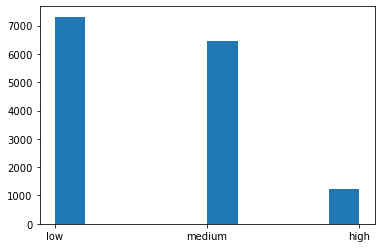

In [11]:
plt.hist(df['salary']) 

In [12]:
df['Departments '].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

(array([4140.,  767.,  739., 2720., 2229.,  630., 1227.,  902.,  858.,
         787.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

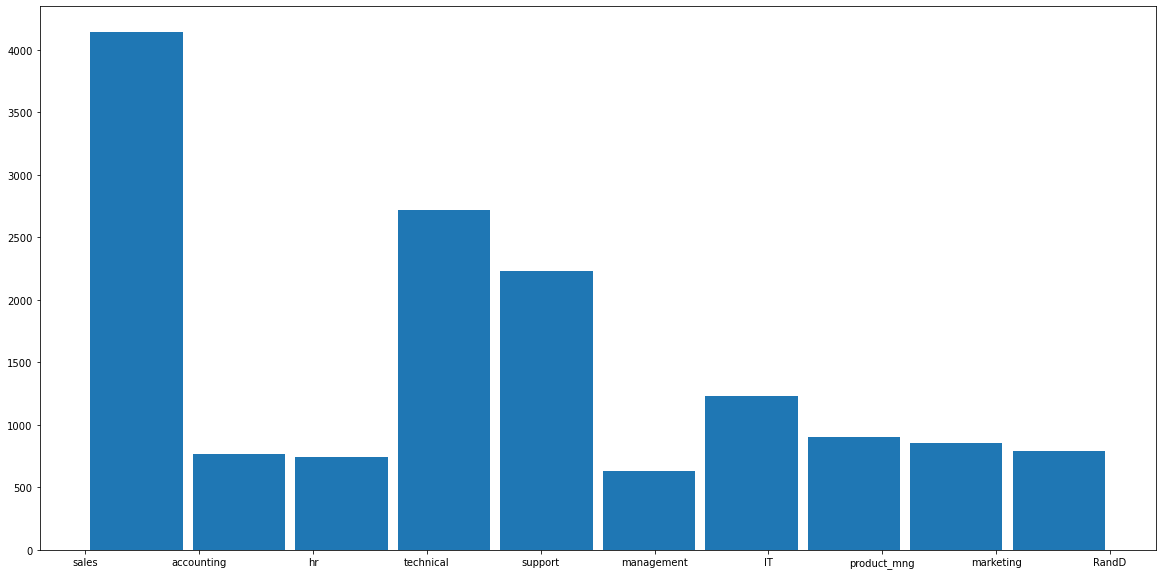

In [13]:
plt.figure(figsize=(20,10))
plt.hist(df['Departments '],align='mid',rwidth=0.9)


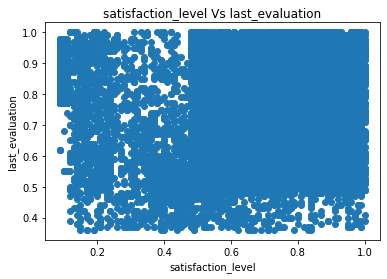

In [15]:
plt.title("satisfaction_level Vs last_evaluation")
plt.scatter(df['satisfaction_level'],df['last_evaluation'],)
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.show();


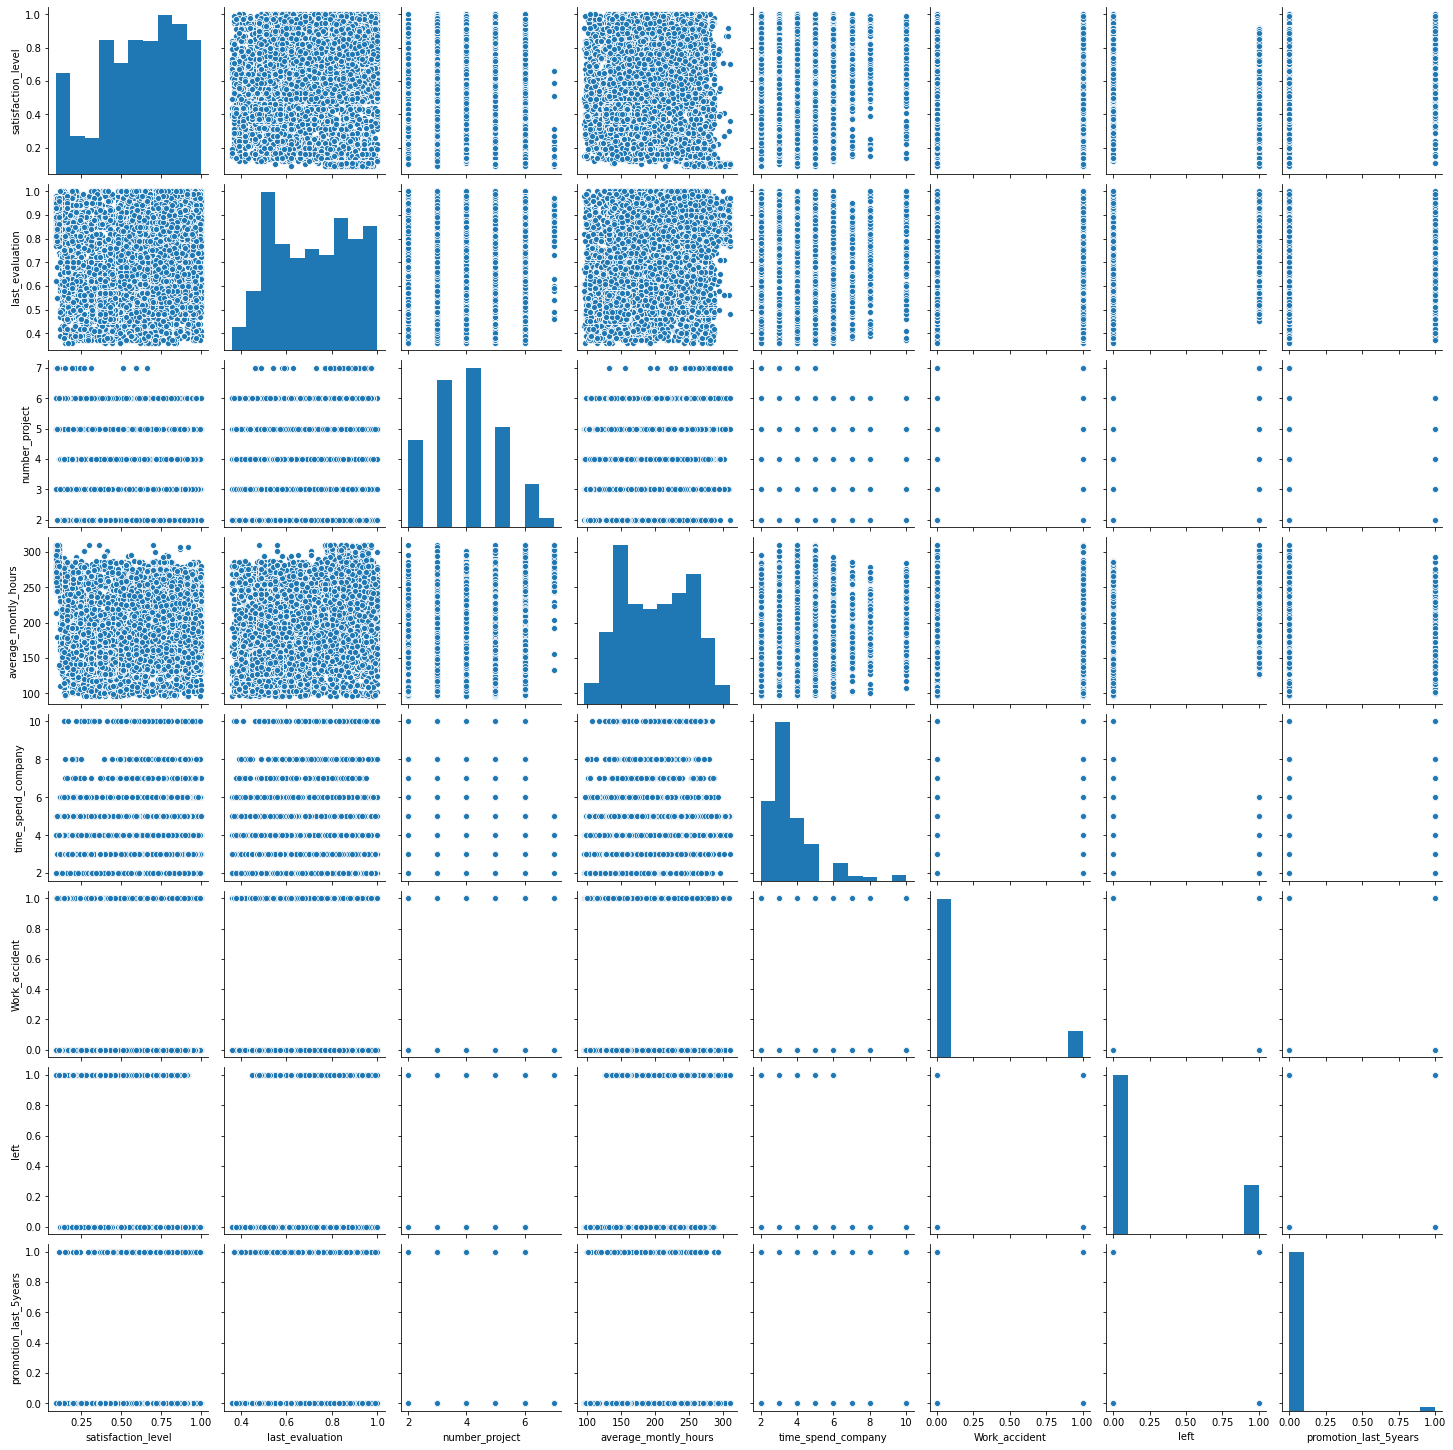

In [26]:
sns.pairplot(df);

#### Finding the patterns within the data w.r.t target variable: left

In [17]:
left = df.groupby('left')

In [19]:
left.mean()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [20]:
left.count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [21]:
left.count()['satisfaction_level']

left
0    11428
1     3571
Name: satisfaction_level, dtype: int64

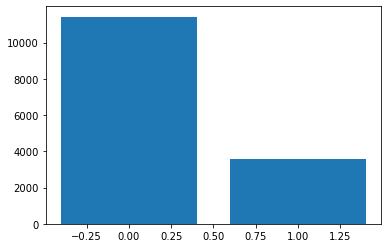

In [23]:
plt.bar(left.count().index.values,left.count()['satisfaction_level']);


In [24]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Similarly can be plotted between different variables individually
### Using seaborn to plot visualizations

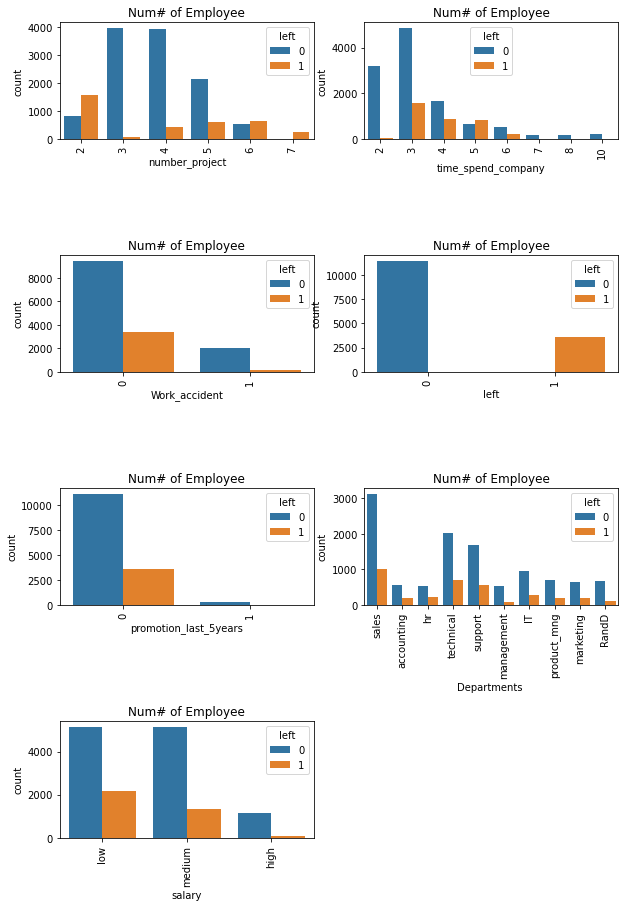

In [27]:
features=['number_project','time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=df, hue='left')
    plt.xticks(rotation=90)
    plt.title('Num# of Employee')

#### Converting the Categorical features into Numeric for Modeling building

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
cat_features = ['Departments ', 'salary']
ct=ColumnTransformer([('OneHotEncondingTrans',OneHotEncoder(sparse=False, drop='first'),cat_features)],remainder='passthrough')

X1=df.loc[:,['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]


In [31]:
X1.shape

(14999, 9)

In [30]:
X2=ct.fit_transform(X1)
X2.shape

(14999, 18)

In [32]:
y=df.loc[:,'left']


## Model Building


#### Splitting the dataset into Train and Test sets


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X2,y,test_size=0.3, random_state=0)
X_train.shape 


(10499, 18)

In [35]:
X_test.shape 

(4500, 18)

#### Feature Scaling. This is to Standardize the data.

In [36]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)


### Using Extreme Gradient Boosting Model (XGBoost)

In [37]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Predicting using above model on Test set


In [38]:
y_pred =xgb_model.predict(X_test)
y_pred.shape


(4500,)

In [40]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Creating Confusion Matrix to evaluate the model performance

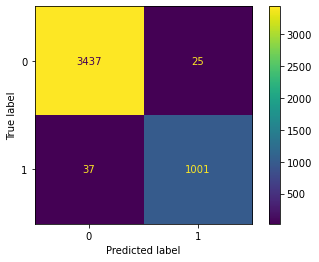

In [42]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(y_test, y_pred,labels=[1,0])
plot_confusion_matrix(xgb_model, X_test,y_test);


### Calculating the Model Metrics: Accuracy, Precision, Recall and F1 score

In [43]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
print("accuracy of XGBoost: ",accuracy_score(y_test, y_pred))
print("Precision, recall, F1 Score, Support: ", precision_recall_fscore_support(y_test, y_pred))

accuracy of XGBoost:  0.9862222222222222
Precision, recall, F1 Score, Support:  (array([0.98934945, 0.97563353]), array([0.99277874, 0.96435453]), array([0.99106113, 0.96996124]), array([3462, 1038], dtype=int64))


### Plotting the ROC-AUC curve to visualize the Model Performance

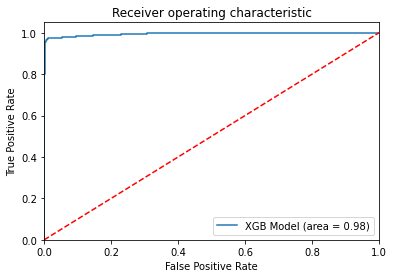

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc= roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## Saving the Model using Pickle

In [45]:
import pickle
filename='xgb_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

### Loading the saved model


In [47]:
loading_model = pickle.load(open('xgb_model.sav', 'rb'))
result = loading_model.score(X_test, y_test)
print("Accuary Score: {0:.3f} ".format(result))
#print("result: {0:.3f} %".format(result*100))

Accuary Score: 0.986 


### Extracting the Prediction Probabilities and optimizing it

In [48]:
np.set_printoptions(precision=4, suppress=True)

In [49]:
pred_prob = xgb_model.predict_proba(X_test)
pred_prob[:10]

array([[0.0114, 0.9886],
       [0.9998, 0.0002],
       [0.9986, 0.0014],
       [0.9999, 0.0001],
       [0.9999, 0.0001],
       [0.9998, 0.0002],
       [0.9809, 0.0191],
       [0.9996, 0.0004],
       [0.9985, 0.0015],
       [0.0019, 0.9981]], dtype=float32)

### The above shows 2 probabilities: each representing the probability of each class, 0 and 1. It means, in the first row of the array: There is 98.86% probability that it is class 1 and only 0.0114 prob. of class 0.

In [50]:
pred_prob_pos = pred_prob[:,1]

## Considering a different Probability threshold (0.4) compared to default 0.5

In [51]:
y_pred1 = [1 if x > 0.4 else 0 for x in pred_prob_pos ]

### Creating a dataframe to see the difference between different Probability thresholds


In [52]:
y_pred_df = pd.DataFrame({'y_pred_orig': y_pred, 'y_pred_0.38':y_pred1})

In [53]:
y_pred_df['equalornot'] = [True if y_pred_df['y_pred_orig'][x] == y_pred_df['y_pred_0.38'][x] 
                           else False for x in y_pred_df.index]

In [55]:
y_pred_df.head(6)

,y_pred_orig,y_pred_0.38,equalornot
0,1,1,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,0,0,True


In [54]:
y_pred_df[y_pred_df['equalornot'] == False].count()

y_pred_orig    10
y_pred_0.38    10
equalornot     10
dtype: int64

In [56]:
y_pred_df[y_pred_df['y_pred_orig'] != y_pred_df['y_pred_0.38']]

,y_pred_orig,y_pred_0.38,equalornot
160,0,1,False
641,0,1,False
991,0,1,False
995,0,1,False
2039,0,1,False
3371,0,1,False
3856,0,1,False
3980,0,1,False
4013,0,1,False
4498,0,1,False


## Conclusion
### Model built using XGBoost algorithm is extremely good as it is giving very high performance metrics. This model can be used to predict which employee will leave the organisation based on available factors/features.